In [1]:
import pandas as pd 

df = pd.read_csv("../data/raw/complaints.csv")

df.head()

df.info()

df.describe()




C:\Users\tsega\AppData\Local\Temp\ipykernel_5048\489919126.py:3: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("../data/raw/complaints.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9609797 entries, 0 to 9609796
Data columns (total 18 columns):
 #   Column                        Dtype 
---  ------                        ----- 
 0   Date received                 object
 1   Product                       object
 2   Sub-product                   object
 3   Issue                         object
 4   Sub-issue                     object
 5   Consumer complaint narrative  object
 6   Company public response       object
 7   Company                       object
 8   State                         object
 9   ZIP code                      object
 10  Tags                          object
 11  Consumer consent provided?    object
 12  Submitted via                 object
 13  Date sent to company          object
 14  Company response to consumer  object
 15  Timely response?              object
 16  Consumer disputed?            object
 17  Complaint ID                  int64 
dtypes: int64(1), object(17)
memory usage: 1.3+

,Complaint ID
count,9.609797e+06
mean,8.092744e+06
std,3.774842e+06
min,1.000000e+00
25%,5.038016e+06
50%,8.448508e+06
75%,1.129591e+07
max,1.423259e+07


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\tsega\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Shape: (9609797, 18)

Missing values:
 Date received                         0
Product                               0
Sub-product                      235295
Issue                                 6
Sub-issue                        839522
Consumer complaint narrative    6629041
Company public response         4770207
Company                               0
State                             54516
ZIP code                          30228
Tags                            8981029
Consumer consent provided?      1649561
Submitted via                         0
Date sent to company                  0
Company response to consumer         20
Timely response?                      0
Consumer disputed?              8841498
Complaint ID                          0
dtype: int64

Columns: ['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue', 'Consumer complaint narrative', 'Company public response', 'Company', 'State', 'ZIP code', 'Tags', 'Consumer consent provided?', 'Submitted via', 'Date 

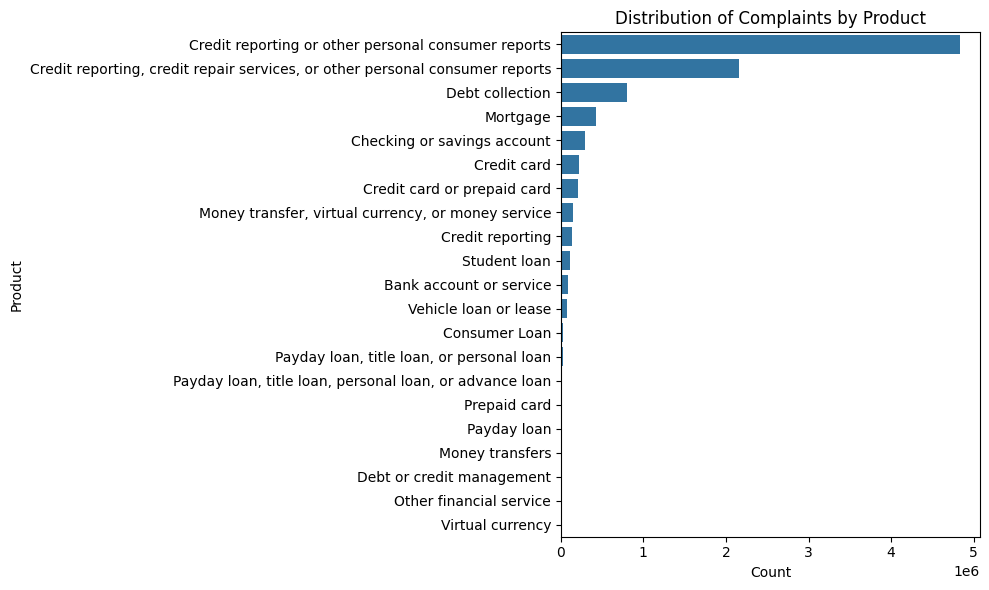

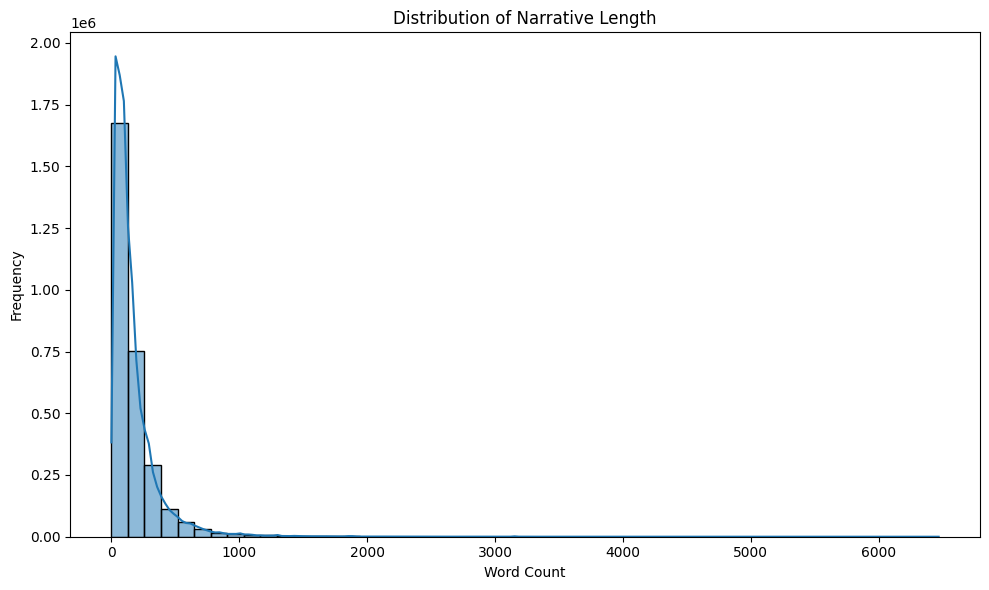


Narrative length stats:
count    2.980756e+06
mean     1.755976e+02
std      2.259282e+02
min      1.000000e+00
25%      5.900000e+01
50%      1.140000e+02
75%      2.090000e+02
max      6.469000e+03
Name: Narrative Length, dtype: float64

Complaints with narrative: 2980756
Complaints without narrative: 6629041

Filtered shape: (82164, 19)
Saved cleaned data to ../data/processed/filtered_complaints.csv


In [2]:
import os
import sys
sys.path.append('..')
from src import eda_preprocessing


# EDA
eda_preprocessing.initial_eda(df)
eda_preprocessing.plot_complaint_distribution(df)
eda_preprocessing.analyze_narrative_length(df)
eda_preprocessing.count_narratives(df)

# Filter & Clean
df_filtered = eda_preprocessing.filter_data(df)
df_cleaned = eda_preprocessing.clean_narratives(df_filtered)

# Detect & Remove boilerplate
boilerplate_phrases = eda_preprocessing.detect_boilerplate_phrases(df_cleaned['Cleaned Narrative'], top_n=15)
df_cleaned['Cleaned Narrative'] = df_cleaned['Cleaned Narrative'].apply(
    lambda x: eda_preprocessing.remove_boilerplate_phrases(x, boilerplate_phrases)
)

# Save
eda_preprocessing.save_cleaned_data(df_cleaned)

